In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.stats import pearsonr, spearmanr
plt.style.use('../images/presentation.mplstyle')
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
def get_cmap(n=20, map_str= 'hsv'):
    cmap = plt.get_cmap(map_str)
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

In [3]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00141.csv")
geo_stats_2 = pd.read_csv("corona_city_table_ver_0076.csv")
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0031.csv")


recover_data = pd.read_excel("corona_recovered_ver_00120.xlsx")
hospital_data = pd.read_csv("corona_hospitalization_ver_00231.csv")
dead_data = pd.read_csv("corona_deceased_ver_0095.csv")

age_gender_test_data = pd.read_csv("corona_age_and_gender_ver_0092.csv")
young_test_data = pd.read_excel("young_population_weekly_ver_0037.xlsx")

In [245]:
israel_population = pd.read_excel("israel_population_by_city.xlsx")
israel_population_with_ages = pd.read_excel("israel_total_population_by_age.xlsx")
israel_english_names = pd.read_excel("israel_town_code_name_english.xlsx")
median_israeli_population = pd.read_excel("median_israeli_population.xlsx")

## organize geographic data 

In [211]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00141.csv")
geo_stats['date'] = pd.to_datetime(geo_stats['date'],format='%Y-%m-%d')

In [213]:
geo_stats['weeks_from'] = np.round((geo_stats['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_stats = geo_stats[geo_stats.weeks_from >= 0]

In [214]:
geo_stats = geo_stats.replace(to_replace={'<15': 4})

In [215]:
geo_float_columns = ['accumulated_cases',
       'new_cases_on_date', 'accumulated_recoveries', 'new_recoveries_on_date',
       'accumulated_hospitalized', 'new_hospitalized_on_date',
       'accumulated_deaths', 'new_deaths_on_date',
       'accumulated_diagnostic_tests', 'new_diagnostic_tests_on_date',
       'accumulated_vaccination_first_dose', 'new_vacc_first_dose_on_date',
       'accumulated_vaccination_second_dose', 'new_vacc_second_dose_on_date']
geo_stats[geo_float_columns] = geo_stats[geo_float_columns].astype(float)

In [216]:
weeks_dict_agas = {'weeks_from': 'first',
                   'town_code': 'first',
              'town': 'first', 
              'date': 'first', 
              'accumulated_cases': 'sum',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'sum', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'sum', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'sum',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'sum',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'sum',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'sum',
              'new_vacc_second_dose_on_date': 'sum'}
weeks_dict = {
              'town_code': 'first',
              'town': 'first', 
              'date': 'last', 
              'accumulated_cases': 'last',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'last', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'last', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'last',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'last',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'last',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'last',
              'new_vacc_second_dose_on_date': 'sum'}
geo_stats = geo_stats.groupby(['town_code', 'date'], as_index=False).agg(weeks_dict_agas)
geo_stats = geo_stats.groupby(['weeks_from', 'town_code'], as_index=False).agg(weeks_dict)

In [217]:
all_data_stats = geo_stats[['date', 'accumulated_cases',
        'accumulated_recoveries', 
       'accumulated_hospitalized', 
       'accumulated_deaths',
       'accumulated_diagnostic_tests', 
       'accumulated_vaccination_first_dose',
       'accumulated_vaccination_second_dose']]

In [218]:
# all_data_stats[all_data_stats['date']==] 

In [219]:
summed_date = {
              'accumulated_cases': 'sum',
                'accumulated_recoveries': 'sum', 
                'accumulated_hospitalized': 'sum', 
                'accumulated_deaths': 'sum',
               'accumulated_diagnostic_tests': 'sum', 
                'accumulated_vaccination_first_dose': 'sum', 
               'accumulated_vaccination_second_dose': 'sum', 
                    }

all_data_stats_sum = all_data_stats.groupby(['date'], as_index=False).agg(summed_date)

In [220]:
second_wave_begining= pd.to_datetime('2020-05-28',format='%Y-%m-%d')
second_wave_end= pd.to_datetime('2020-12-10',format='%Y-%m-%d')
all_data_second_wave=all_data_stats_sum.loc[all_data_stats_sum['date']>=second_wave_begining,:]

In [221]:
all_data_second_wave=all_data_second_wave.loc[all_data_second_wave['date']<=second_wave_end,:]

Timestamp('2020-11-13 00:00:00')

In [347]:
third_wave_begining= pd.to_datetime('2020-11-10',format='%Y-%m-%d')
third_wave_end= pd.to_datetime('2021-03-30',format='%Y-%m-%d')
all_data_third_wave=all_data_stats_sum.loc[all_data_stats_sum['date']>=third_wave_begining,:]
all_data_third_wave=all_data_third_wave.loc[all_data_third_wave['date']<=third_wave_end,:]
active_cases=all_data_third_wave['accumulated_cases']-all_data_third_wave['accumulated_deaths']-all_data_third_wave['accumulated_recoveries']
time_from_start=all_data_third_wave['date']-all_data_third_wave['date'].iloc[0]
time = []
for i in time_from_start:
    time.append(i.days)
np.save('time_3rd_wave.npy', time)

In [342]:
active_cases.size

20

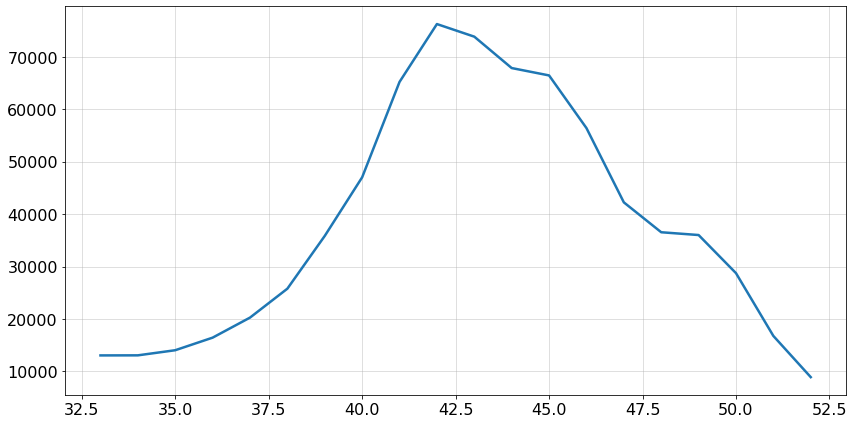

In [339]:
plt.plot(active_cases)
plt.grid()

In [223]:
time_from_start=all_data_second_wave['date']-all_data_second_wave['date'][9]

In [224]:
time = []
for i in time_from_start:
    time.append(i.days)
    

In [340]:
np.save('active_cases_3rd_wave.npy', active_cases)

In [246]:
israel_english_names = israel_english_names.rename(columns={'town':'city'})

In [247]:
israel_population = israel_population.rename(columns={'city_code':'town_code', 'city': 'town'})

In [248]:
median_israeli_population = median_israeli_population.rename(columns={'city_code':'town_code'})

In [249]:
median_israeli_population = median_israeli_population.drop(columns=['city', 'population_size','city_english'])

In [250]:
geo_stats = pd.merge(median_israeli_population, geo_stats, how='right', on='town_code')

In [251]:
geo_stats = pd.merge(israel_population, geo_stats, how='right', on=['town_code'])

In [252]:
geo_stats = pd.merge(israel_english_names, geo_stats, how='right', on='town_code')

In [270]:
percentage_dict = {f'percentage_{w}' : 100 * geo_stats[w] / geo_stats['num_population'] for w in geo_float_columns}
percentage_dict['weeks_from'] = geo_stats.weeks_from
percentage_dict['town_code'] = geo_stats.town_code
percentage_df = pd.DataFrame(percentage_dict)

In [271]:
geo_stats = pd.merge(geo_stats, percentage_df, on=['weeks_from', 'town_code'], how='inner')

In [272]:
geo_stats['percentage_accumulated_immuned'] = geo_stats.percentage_accumulated_recoveries + geo_stats.percentage_accumulated_vaccination_second_dose
geo_stats['accumulated_immuned'] = geo_stats.accumulated_recoveries + geo_stats.accumulated_vaccination_second_dose

In [273]:
# geo_stats_48 = geo_stats[geo_stats['weeks_from'] == 48]
# geo_stats_50_52 = geo_stats[(geos_stats['weeks_from']>=50) & (geos_stats['weeks_from']<53)]
# total_country_per_week = geo_stats.groupby('weeks_from').agg(weeks_dict)
total_weeks_dict = {'date': 'last', 
              'accumulated_cases': 'sum',
              'new_cases_on_date': 'sum', 
              'accumulated_recoveries': 'sum', 
              'new_recoveries_on_date': 'sum',
              'accumulated_hospitalized': 'sum', 
              'new_hospitalized_on_date': 'sum',
              'accumulated_deaths': 'sum',
              'new_deaths_on_date': 'sum',
              'accumulated_diagnostic_tests': 'sum',
              'new_diagnostic_tests_on_date': 'sum',
              'accumulated_vaccination_first_dose':'sum',
              'new_vacc_first_dose_on_date': 'sum',
              'accumulated_vaccination_second_dose': 'sum',
              'new_vacc_second_dose_on_date': 'sum', 
              'accumulated_immuned': 'sum'}
total_country_per_week = geo_stats.groupby('weeks_from', as_index=False).agg(total_weeks_dict)[['weeks_from', 'new_cases_on_date']].rename(columns={'new_cases_on_date':'new_cases_on_date_country'})
total_immune_country_per_week = geo_stats.groupby('weeks_from', as_index=False).agg(total_weeks_dict)[['weeks_from', 'accumulated_immuned']].rename(columns={'accumulated_immuned':'accumulated_immuned_country'})
geo_stats = pd.merge(total_country_per_week, geo_stats, how='right', on='weeks_from')
geo_stats = pd.merge(total_immune_country_per_week, geo_stats, how='right', on='weeks_from')

In [274]:
geo_stats['percentage_new_cases_on_date_country'] = 100 * geo_stats['new_cases_on_date_country'] / 9200000
geo_stats['percentage_accumulated_immuned_country'] = 100 * geo_stats['accumulated_immuned_country'] / 9200000

In [275]:
geo_stats['percentage_new_cases_on_date_by_tot'] = 100 * (geo_stats['new_cases_on_date'] / geo_stats['new_cases_on_date_country'])

In [276]:
geo_stats.columns

Index(['weeks_from', 'accumulated_immuned_country',
       'new_cases_on_date_country', 'town_code', 'city', 'town_english',
       'city_name', 'num_population', 'median_age', 'town', 'date',
       'accumulated_cases', 'new_cases_on_date', 'accumulated_recoveries',
       'new_recoveries_on_date', 'accumulated_hospitalized',
       'new_hospitalized_on_date', 'accumulated_deaths', 'new_deaths_on_date',
       'accumulated_diagnostic_tests', 'new_diagnostic_tests_on_date',
       'accumulated_vaccination_first_dose', 'new_vacc_first_dose_on_date',
       'accumulated_vaccination_second_dose', 'new_vacc_second_dose_on_date',
       'percentage_accumulated_cases', 'percentage_new_cases_on_date',
       'percentage_accumulated_recoveries',
       'percentage_new_recoveries_on_date',
       'percentage_accumulated_hospitalized',
       'percentage_new_hospitalized_on_date', 'percentage_accumulated_deaths',
       'percentage_new_deaths_on_date',
       'percentage_accumulated_diagnostic_t

In [277]:
Nuria_cases_hosp_deat_time=geo_stats[['date','new_cases_on_date','accumulated_cases','new_recoveries_on_date','accumulated_recoveries',
           'new_hospitalized_on_date','accumulated_hospitalized','new_deaths_on_date',
            'accumulated_deaths' ,'new_vacc_first_dose_on_date','new_vacc_second_dose_on_date',
           'accumulated_vaccination_first_dose','accumulated_vaccination_second_dose']]
Nuria_cases_hosp_deat_time.to_csv (r'C:\Users\SPO1HFA\prediction_model\Nuria_data\cases_hos_death_vac.csv', index = False, header=True)

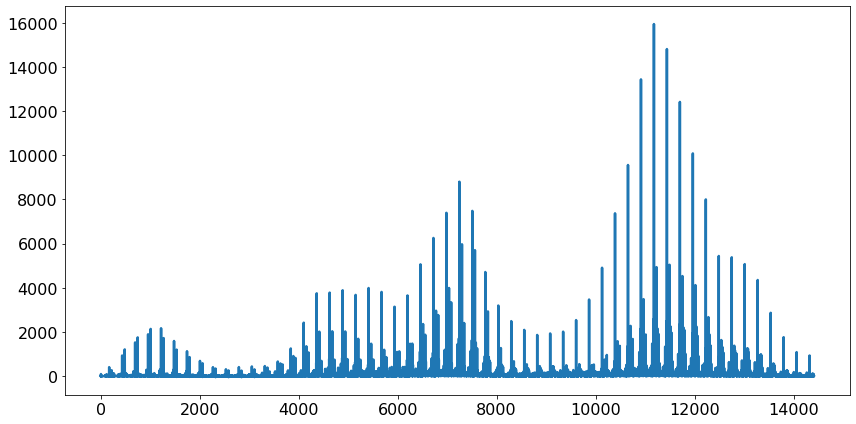

In [278]:
plt.plot(Nuria_cases_hosp_deat_time['accumulated_cases']-Nuria_cases_hosp_deat_time['accumulated_recoveries']-Nuria_cases_hosp_deat_time['accumulated_deaths'])

In [279]:
# geo_stats.sort_values(ascending=False, by='num_population').num_population.unique()
geo_stats_big_cities = geo_stats[(geo_stats.num_population >= 1000)]
geo_stats_big_cities_40 = geo_stats_big_cities[(geo_stats_big_cities.weeks_from >= 40) & ((geo_stats.weeks_from < np.max(geo_stats.weeks_from)))]
geo_stats_40 = geo_stats[(geo_stats.weeks_from >= 40) & ((geo_stats.weeks_from < np.max(geo_stats.weeks_from)))]

[]

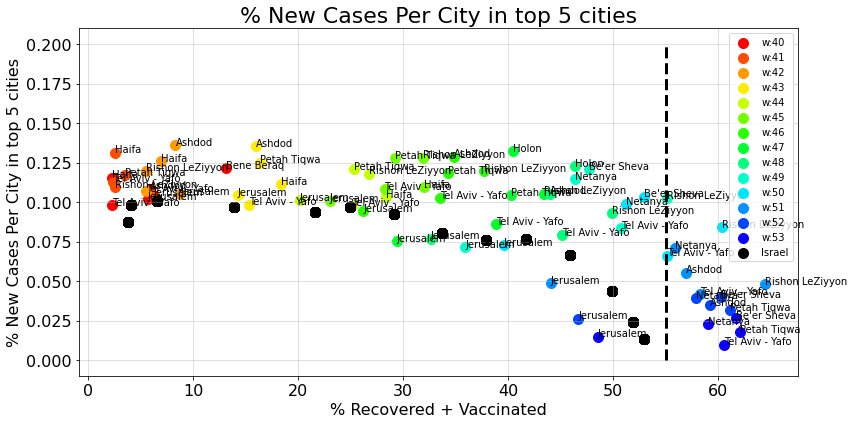

In [348]:
fig, ax = plt.subplots(1, 1)
pearson_coeff = []
spearman_coeff = []
colors = get_cmap(20)
num_cities = 5
for i, (w, df_w) in enumerate(geo_stats_40.groupby('weeks_from')):
    df_w = df_w.sort_values(ascending=False, by='new_cases_on_date')
    df_w = df_w.iloc[:num_cities,:]
    percentage_accumulated_r = df_w['percentage_accumulated_vaccination_second_dose'] + df_w['percentage_accumulated_recoveries']
#     percentage_new_cases = 100 * (df_w['new_cases_on_date'] / df_w['new_cases_on_date_country'])
#     percentage_new_cases =  df_w['percentage_new_cases_on_date'] #- df_w['percentage_new_cases_on_date_country'])
    percentage_new_cases =  df_w['percentage_new_cases_on_date'] 
    df_w['percentage_new_cases'] = percentage_new_cases
    ax.scatter(percentage_accumulated_r, percentage_new_cases, label=f'w:{w}', color=colors[i])
    p_coeff, _ = pearsonr(percentage_accumulated_r, df_w.percentage_new_cases_on_date)
    s_coeff, _ = spearmanr(percentage_accumulated_r, df_w.percentage_new_cases_on_date)
    pearson_coeff.append(p_coeff)
    spearman_coeff.append(s_coeff)
    for x, y, c in zip(percentage_accumulated_r, percentage_new_cases, df_w['town_english']):
        plt.text(x, y, c)
ax.scatter(geo_stats_40.percentage_accumulated_immuned_country, geo_stats_40.percentage_new_cases_on_date_country, c='k', label='Israel')
ax.set_xlabel('% Recovered + Vaccinated')
ax.set_title(f'% New Cases Per City in top {num_cities} cities')
ax.set_ylabel(f'% New Cases Per City in top {num_cities} cities')
ax.legend()
ax.grid()
ax.plot([55, 55], [0, 0.2], linestyle='--', linewidth=3, color='k')
ax.plot()

In [281]:
df_w51 = geo_stats[geo_stats.weeks_from == 51]
df_w51 = df_w51.sort_values(ascending=False, by='new_cases_on_date')
df_w51 = df_w51.iloc[:200,:]
percentage_accumulated_r = df_w51['percentage_accumulated_vaccination_second_dose'] + df_w51['percentage_accumulated_recoveries']
percentage_new_cases =  df_w51['percentage_new_cases_on_date'] #- df_w['percentage_new_cases_on_date_country'])
df_w51['percentage_new_cases'] = percentage_new_cases
df_w51s = df_w51.sort_values(by='percentage_new_cases')
young_cities = df_w51s[df_w51s.percentage_new_cases <= 55].city
print(f"young cities:\n{young_cities.values}")
old_cities = df_w51s[df_w51s.percentage_new_cases <= 55].city
print(f"old cities:\n{old_cities.values}")

young cities:
['אום אל-פחם' 'קריית שמונה' 'שוהם' 'רמת השרון' 'טייבה' 'שפרעם' 'טמרה'
 'גבעת שמואל' 'אריאל' 'באר יעקב' "סח'נין" 'תל מונד' 'באקה אל-גרביה'
 'הוד השרון' 'גבעתיים' 'רמת ישי' 'מודיעין-מכבים-רעות*' 'טירת כרמל'
 'כפר כנא' 'טירה' 'הרצלייה' 'מזכרת בתיה' 'חורה' 'עראבה' 'כפר סבא' 'ערערה'
 "ג'דיידה-מכר" 'ירוחם' 'יקנעם עילית' 'כפר קאסם' 'פוריידיס' 'קלנסווה'
 'ביתר עילית' 'מגאר' 'נחף' 'ביר אל-מכסור' 'כפר קרע' 'גדרה' 'רמת גן'
 'דייר אל-אסד' 'כסיפה' 'קריית אונו' 'כרמיאל' 'קריית ים' 'ערערה-בנגב'
 'רעננה' 'מבשרת ציון' 'גן יבנה' "ג'סר א-זרקא" 'עתלית' 'תל שבע' 'בני ברק'
 'כפר מנדא' 'מודיעין עילית' 'כאבול' 'יפיע' 'ריינה' 'נשר' 'קריית ביאליק'
 'דבורייה' 'דייר חנא' 'גני תקווה' 'דאלית אל-כרמל' 'בסמ"ה' 'אכסאל' 'ירכא'
 'אלעד' 'חיפה' 'בית שמש' 'תל אביב -יפו' 'חולון' 'אילת' 'שעב' 'לקיה'
 'חצור הגלילית' 'יבנה' 'כפר יונה' 'פתח תקווה' 'עין מאהל' 'צור הדסה'
 "מג'ד אל-כרום" 'בוקעאתא' 'שגב-שלום' 'כוכב יאיר' 'עפולה' 'קריית מוצקין'
 'מעלה עירון' 'נהרייה' 'יהוד' 'זכרון יעקב' 'ראשון לציון' 'עספיא'
 'ראש העין

Text(0, 0.5, '% New Cases Per City in top 5 cities')

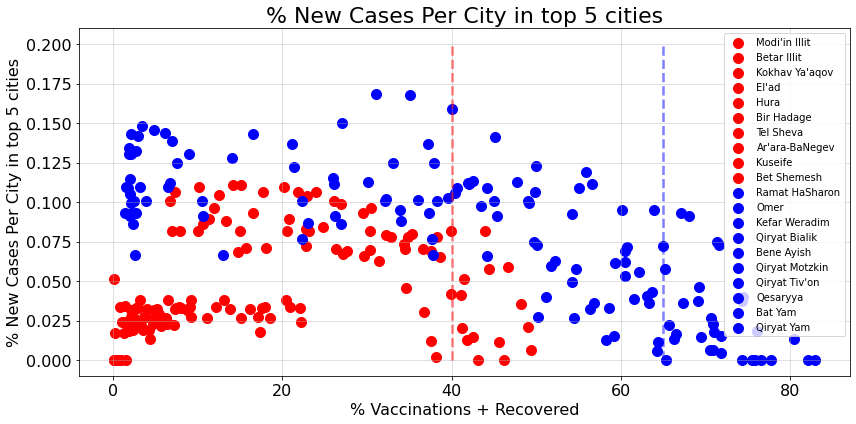

In [327]:
colors_a = get_cmap(20)
# old_cities = ['חיפה', 'בת ים', 'רמת גן', 'קריית ים', 'קריית מוצקין', 'גבעתיים','רמת השרון']
# young_cities = ['בני ברק', 'אלעד', 'ביתר עילית', 'קריית יערים', 'קלנסווה', 'רהט','חריש']
young_cities = geo_stats_40.sort_values(by=['weeks_from','median_age']).dropna().city.iloc[:10]
old_cities = geo_stats_40.sort_values(by=['weeks_from','median_age']).dropna().city.iloc[-10:]
young_c = 'r'
old_c = 'b'
for c in young_cities:
    city_data = geo_stats_40[geo_stats_40['city'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=young_c)
for c in old_cities:
    city_data = geo_stats_40[geo_stats_40['city'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=old_c)
plt.plot([40, 40], [0, 0.2], color='r', linestyle='--', alpha=0.5)
plt.plot([65, 65], [0, 0.2], color='b', linestyle='--', alpha=0.5)
plt.grid()
plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')

Text(0, 0.5, '% New Cases Per City in top 5 cities')

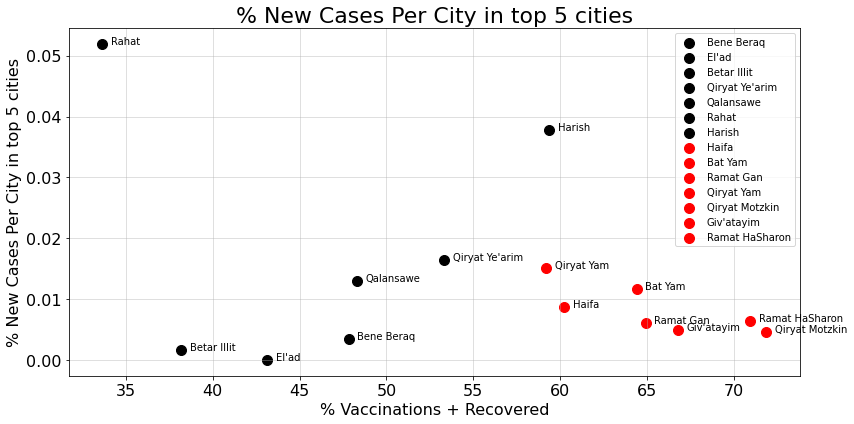

In [283]:
geo_stats_53 = geo_stats[geo_stats['weeks_from'] == 53]

old_cities = ['חיפה', 'בת ים', 'רמת גן', 'קריית ים', 'קריית מוצקין', 'גבעתיים','רמת השרון']
young_cities = ['בני ברק', 'אלעד', 'ביתר עילית', 'קריית יערים', 'קלנסווה', 'רהט','חריש']
old_c = 'r'
young_c = 'k'
for c in young_cities:
    city_data = geo_stats_53[geo_stats_53['town'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=young_c)
    plt.text(percentage_accumulated_ashdod+0.5, percentage_new_cases_ashdod, c_english)

for c in old_cities:
    city_data = geo_stats_53[geo_stats_53['town'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=old_c)    
    plt.text(percentage_accumulated_ashdod+0.5, percentage_new_cases_ashdod, c_english)
plt.grid()
plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')


Text(0, 0.5, '% New Cases Per City in top 5 cities')

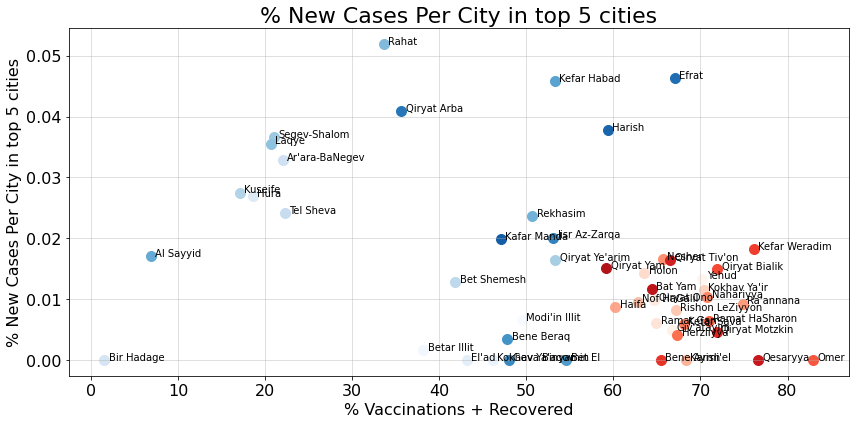

In [324]:
young_cities = geo_stats_53.sort_values(by=['median_age']).dropna().city.iloc[:25]
old_cities = geo_stats_53.sort_values(by=['median_age']).dropna().city.iloc[-25:]
old_c = get_cmap(30, 'Reds')
young_c = get_cmap(30, 'Blues')
for i, c in enumerate(young_cities):
    city_data = geo_stats_53[geo_stats_53['city'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=young_c[i])
    plt.text(percentage_accumulated_ashdod+0.5, percentage_new_cases_ashdod, c_english)

for i, c in enumerate(old_cities):
    city_data = geo_stats_53[geo_stats_53['city'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=old_c[i])    
    plt.text(percentage_accumulated_ashdod+0.5, percentage_new_cases_ashdod, c_english)
plt.grid()
# plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')


Text(0, 0.5, '% New Cases Per City in top 5 cities')

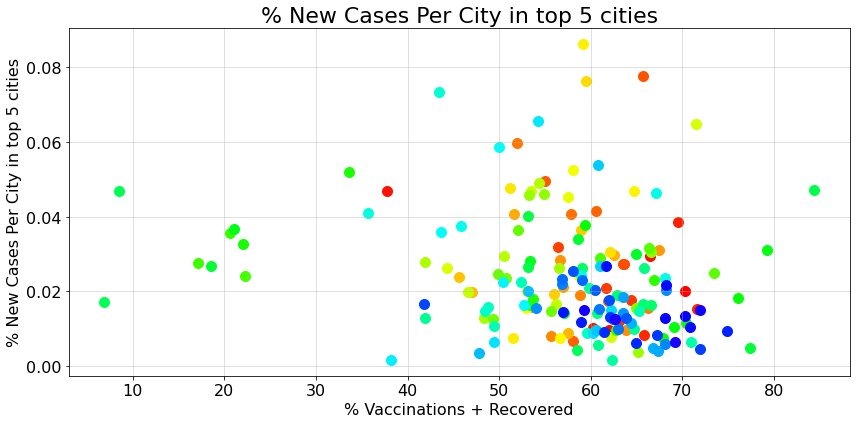

In [137]:
colors = get_cmap(250, 'hsv')
geo_stats_53_t = geo_stats_53[(geo_stats_53.percentage_new_cases_on_date<=0.09) & (geo_stats_53.percentage_new_cases_on_date>=0.0001)]
for i, c in enumerate(geo_stats_53_t.town.unique()):
    city_data = geo_stats_53_t[geo_stats_53_t['town'] == c]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
    plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=colors[i])
#     plt.text(percentage_accumulated_ashdod+0.5, percentage_new_cases_ashdod, c_english)
plt.grid()
# plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')


In [138]:
geo_stats_53_t[geo_stats_53_t.percentage_new_cases_on_date>0.07]

,weeks_from,accumulated_immuned_country,new_cases_on_date_country,town_code,city,town_english,city_name,num_population,town,date,...,percentage_new_diagnostic_tests_on_date,percentage_accumulated_vaccination_first_dose,percentage_new_vacc_first_dose_on_date,percentage_accumulated_vaccination_second_dose,percentage_new_vacc_second_dose_on_date,percentage_accumulated_immuned,accumulated_immuned,percentage_new_cases_on_date_country,percentage_accumulated_immuned_country,percentage_new_cases_on_date_by_tot
13912,53,4868260.0,1230.0,472,אבו גוש,Abu Ghosh,אבו גוש,7712.64,אבו גוש,2021-04-02,...,0.090760,58.968135,0.090760,49.892125,0.090760,65.723280,5069.0,0.01337,52.91587,0.487805
13938,53,4868260.0,1230.0,517,מזרעה,Mazra'a,מזרעה,3926.03,מזרעה,2021-04-02,...,0.178297,57.539041,0.127355,52.062771,0.178297,59.423896,2333.0,0.01337,52.91587,0.243902
13943,53,4868260.0,1230.0,524,נאעורה,Na'ura,נאעורה,2319.33,נאעורה,2021-04-02,...,0.258695,57.602842,0.215579,51.825312,0.301811,59.198130,1373.0,0.01337,52.91587,0.162602
14062,53,4868260.0,1230.0,3563,תקוע,Teqoa,תקוע,4083.29,תקוע,2021-04-02,...,0.171430,39.355520,0.073470,36.906514,0.122450,43.420869,1773.0,0.01337,52.91587,0.243902


Text(0, 0.5, '% New Cases Per City in top 5 cities')

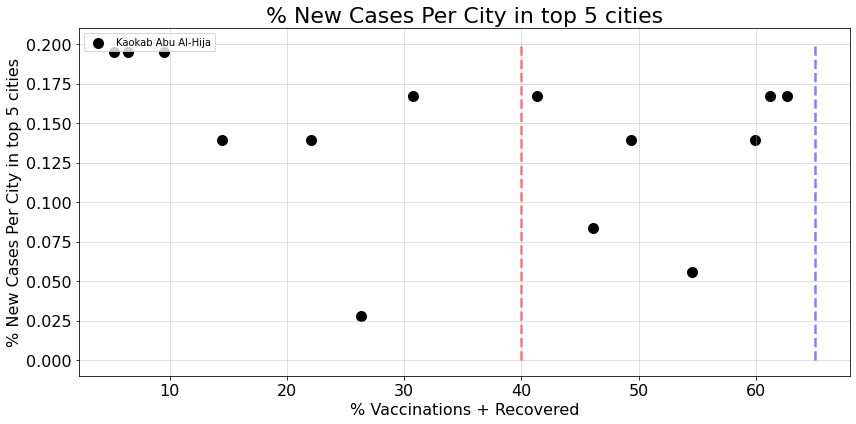

In [135]:
city ="כאוכב אבו אל-היג'א"
city_data = geo_stats_40[geo_stats_40['town'] == city]
c_english = city_data.town_english.iloc[0]
percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color='k')
# city_data = geo_stats_40[geo_stats_40['town'] == 'חולון']
# percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
# percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date'] 
# plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c, color='g')
plt.plot([40, 40], [0, 0.2], color='r', linestyle='--', alpha=0.5)
plt.plot([65, 65], [0, 0.2], color='b', linestyle='--', alpha=0.5)
plt.grid()
plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')

In [53]:
city_data['new_cases_on_date']

10597    43.0
10859    49.0
11121    48.0
11383    32.0
11645    29.0
11907    37.0
12169    44.0
12431    63.0
12693    70.0
12955    72.0
13217    66.0
13479    55.0
13741    40.0
14003    37.0
Name: new_cases_on_date, dtype: float64

Text(0, 0.5, '% New Cases Per City in top 5 cities')

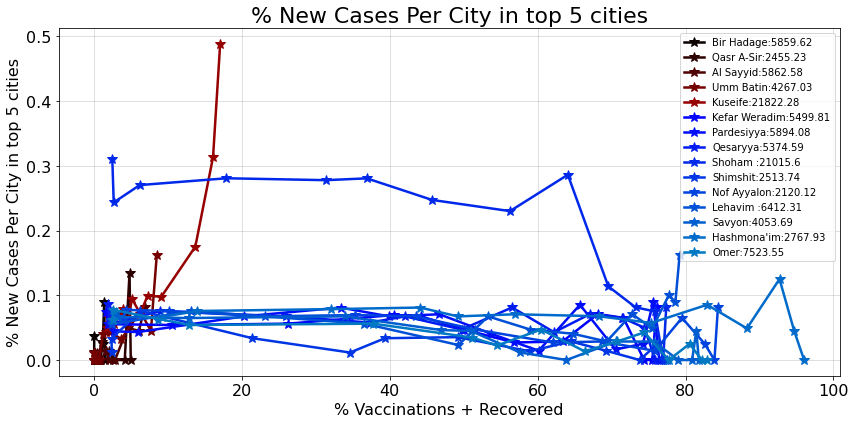

In [121]:
geo_sorted = geo_stats[geo_stats.weeks_from == 52].sort_values(ascending=False, by='new_cases_on_date')
geo_sorted = geo_sorted[geo_sorted.num_population > 500]
towns_by_vacc = geo_sorted.sort_values(by='percentage_accumulated_vaccination_second_dose')[['town']]
lowest_vacc = towns_by_vacc.iloc[:5].values
highest_vacc = towns_by_vacc.iloc[-10:].values
high_c = get_cmap(20, 'winter')
low_c = get_cmap(20, 'hot')
for c in range(lowest_vacc.size):
    city_data = geo_stats_40[geo_stats_40['town'] == lowest_vacc[c][0]]
    c_english = city_data.town_english.iloc[0]
    n_pop = city_data.num_population.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  100* (city_data['new_cases_on_date'] / city_data['new_cases_on_date_country'])
#     plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english,  c=city_data.weeks_from, cmap='Greens')
    plt.plot(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=f"{c_english}:{n_pop}", color=low_c[c], marker='*')

for c in range(highest_vacc.size):
    city_data = geo_stats_40[geo_stats_40['town'] == highest_vacc[c][0]]
    c_english = city_data.town_english.iloc[0]
    n_pop = city_data.num_population.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  100* (city_data['new_cases_on_date'] / city_data['new_cases_on_date_country'])
#     plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, c=city_data.weeks_from, cmap='Reds')
    plt.plot(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=f"{c_english}:{n_pop}", color=high_c[c], marker='*')

# city_data = geo_stats_40[geo_stats_40['town'] == 'ירושלים']
# percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
# percentage_new_cases_ashdod =  100 * (city_data['new_cases_on_date'] / city_data['new_cases_on_date_country'])
# plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c, color='g')
# plt.plot([40, 40], [0, 0.2], c='r', linestyle='--', alpha=0.5)
# plt.plot([70, 70], [0, 0.2], color='b', linestyle='--', alpha=0.5)
plt.grid()
plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')

In [ ]:
geo_stats.sort_values(ascending=True, by=['weeks_from','percentage_accumulated_immuned'])[geo_stats.weeks_from == 46][['town', 'num_population', 'new_cases_on_date', 'percentage_new_cases_on_date', 'percentage_accumulated_immuned']]

In [ ]:
geo_sorted = geo_stats.sort_values(ascending=True, by=['weeks_from','percentage_accumulated_immuned'])
# geo_sorted = geo_sorted[geo_sorted.percentage_accumulated_immuned<=50]
# towns_by_vacc = geo_sorted.sort_values(by='new_cases_on_date')[['town']]
lowest_vacc = geo_sorted[['town']].iloc[:10].values
highest_vacc = geo_sorted[['town']].iloc[-10:].values

high_c = get_cmap(20, 'winter')
low_c = get_cmap(20, 'hsv')
for c in range(lowest_vacc.size):
    city_data = geo_stats_40[geo_stats_40['town'] == lowest_vacc[c][0]]
    c_english = city_data.town_english.iloc[0]
    percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
    percentage_new_cases_ashdod =  city_data['new_cases_on_date']
#     plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english,  c=city_data.weeks_from, cmap='Greens')
    plt.plot(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=low_c[c], marker='*')
# for c in range(highest_vacc.size):
#     city_data = geo_stats_40[geo_stats_40['town'] == highest_vacc[c][0]]
#     c_english = city_data.town_english.iloc[0]
#     percentage_accumulated_ashdod = city_data['percentage_accumulated_vaccination_second_dose'] + city_data['percentage_accumulated_recoveries']
#     percentage_new_cases_ashdod =  city_data['percentage_new_cases_on_date']
# #     plt.scatter(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english,  c=city_data.weeks_from, cmap='Greens')
#     plt.plot(percentage_accumulated_ashdod, percentage_new_cases_ashdod, label=c_english, color=high_c[c], marker='*')

plt.grid()
plt.legend()
plt.xlabel('% Vaccinations + Recovered')
plt.title(f'% New Cases Per City in top {num_cities} cities')
plt.ylabel(f'% New Cases Per City in top {num_cities} cities')

In [ ]:
geo_sorted[['city', 'new_cases_on_date', 'percentage_accumulated_immuned']]

In [ ]:
percentage_accumulated_tot_r = geo_stats_40.percentage_accumulated_vaccination_second_dose + geo_stats_40.percentage_accumulated_recoveries
p_coeff, _ = pearsonr(percentage_accumulated_tot_r, geo_stats_40.percentage_new_cases_on_date)
s_coeff, _ = spearmanr(percentage_accumulated_tot_r, geo_stats_40.percentage_new_cases_on_date)
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
print("------- percentage new cases -----------")
print(f"from week 40, pearson coeff:{p_coeff}")
print(f"from week 40, spearman coeff:{s_coeff}")

print("------- new cases -----------")
accumulated_tot_r = geo_stats_40.accumulated_vaccination_second_dose + geo_stats_40.accumulated_recoveries
p_coeff, _ = pearsonr(accumulated_tot_r, geo_stats_40.new_cases_on_date)
s_coeff, _ = spearmanr(accumulated_tot_r, geo_stats_40.new_cases_on_date)
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
print(f"from week 40, pearson coeff:{p_coeff}")
print(f"from week 40, spearman coeff:{s_coeff}")


print("------- percentage cases per week -----------")
a=[print(f"w:{w}, pearon:{p}, spearman:{s}") for (w, p, s) in zip(geo_stats_40.weeks_from.unique(), pearson_coeff, spearman_coeff) ]
plt.scatter(range(len(pearson_coeff)), pearson_coeff, label='pearson')
plt.scatter(range(len(spearman_coeff)), spearman_coeff, label='spearman')
plt.grid()

In [ ]:
min_sick = 10
week = 48
# geo_stats_big_cities = geo_stats[(geo_stats.num_population >= 100)]
# geo_stats_big_cities = geo_stats_big_cities[((geo_stats_big_cities.weeks_from == week) | (geo_stats_big_cities.weeks_from == week - 2))]
# geo_stats_big_cities = geo_stats_big_cities[geo_stats_big_cities.new_cases_on_date > min_sick]
geo_stats_s_towns = geo_stats[geo_stats.weeks_from == week].sort_values(ascending=False, by=['new_cases_on_date'])['town_code'].iloc[:50]
geo_stats_s = geo_stats.sort_values(ascending=False, by=['weeks_from', 'new_cases_on_date'])
percentage_52 = 100 * (geo_stats_s[(geo_stats_s.weeks_from == week)]['percentage_new_cases_on_date'].iloc[:50] - geo_stats_s[geo_stats_s.weeks_from == week]['percentage_new_cases_on_date_country'].iloc[:50])
y = percentage_52
x = geo_stats_s[geo_stats_s.weeks_from == week].percentage_accumulated_vaccination_second_dose.iloc[:50] + geo_stats_s[(geo_stats_s.weeks_from == week)].percentage_accumulated_recoveries.iloc[:50]
plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(x, y, label=f"week:{week}")
plt.plot([np.min(x),np.max(x)], [0, 0], color='k', linewidth=5)
plt.grid()
plt.legend()

## organize vaccinations per age

In [ ]:
geo_vacc_pgeo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0031.csv")er_age = geo_vacc_per_age.replace(to_replace={'<15': 4})

In [ ]:
geo_vacc_per_age['Date'] = pd.to_datetime(geo_vacc_per_age['Date'],format='%Y-%m-%d')
geo_vacc_per_age = geo_vacc_per_age.rename(columns={'Date':'date'})

In [ ]:
geo_vacc_per_age.columns

In [ ]:
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
geo_vacc_per_age[float_columns] = geo_vacc_per_age[float_columns].astype(float)

In [ ]:
agg_dict = {k:'sum' for k in float_columns}
geo_vacc_per_age = geo_vacc_per_age.groupby('date', as_index=False).agg(agg_dict)

In [ ]:
agg_dict_weeks = {k:'last' for k in float_columns}
agg_dict_weeks['date'] = 'last'
geo_vacc_per_age['weeks_from'] = np.round((geo_vacc_per_age['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_vacc_per_age = geo_vacc_per_age.groupby('weeks_from', as_index=False).agg(agg_dict_weeks)

In [ ]:
geo_vacc_per_age.columns

In [ ]:
Nuria_vacination = geo_vacc_per_age[['date','weeks_from','first_dose_0-19', 
                                     'first_dose_20-29', 'first_dose_30-39',
                                   'first_dose_40-49', 'first_dose_50-59', 'first_dose_60-69',
                                   'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+',
                                   'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39',
                                   'second_dose_40-49', 'second_dose_50-59', 'second_dose_60-69',
                                   'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']]
Nuria_vacination.rename(columns={'date': 'week start date'})
Nuria_vacination.to_csv(r'C:\Users\SPO1HFA\prediction_model\Nuria_data\vac_by_age.csv', index = False, header=True)

In [ ]:
geo_vacc_per_age[['weeks_from','date']][geo_vacc_per_age['date']>=pd.to_datetime('2020-07-01',format='%Y-%m-%d')]

## edit vaccinations data

In [ ]:
geo_for_vacc = geo_stats[['date','accumulated_cases', 'accumulated_recoveries','accumulated_hospitalized',
                              'accumulated_deaths', 'accumulated_diagnostic_tests', 
                               'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']]

In [ ]:
geo_for_vacc = geo_for_vacc.replace(to_replace={'<15': 4})

In [ ]:
geo_for_vacc['date'] = pd.to_datetime(geo_for_vacc['date'],format='%Y-%m-%d')
geo_for_vacc = geo_for_vacc[geo_for_vacc['date'] >= pd.to_datetime('2020-03-21',format='%Y-%m-%d')]

In [ ]:
geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']] = geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']].astype(float)

In [ ]:
vaccinations_data = geo_for_vacc.groupby('date', as_index=False).agg(
    {'accumulated_cases':'sum',
     'accumulated_recoveries':'sum',
     'accumulated_hospitalized':'sum',
     'accumulated_diagnostic_tests':'sum',
    'accumulated_deaths':'sum',
     'accumulated_vaccination_first_dose':'sum',
     'accumulated_vaccination_second_dose':'sum'
    })

In [ ]:
vaccinations_data['weeks_from'] = np.round((vaccinations_data['date'] - vaccinations_data['date'][0]).dt.days / 7, 1).astype(int)

In [ ]:
# vaccinations_data[vaccinations_data['date'] == '2021-02-18']
# closed_schools = [(0, 6), (14, 23), (25, 31), (41, 45)]
# schools_opened = [()]

In [ ]:
vaccinations_data = vaccinations_data.groupby('weeks_from', as_index=False).agg(
    {'accumulated_cases':'last',
     'accumulated_recoveries':'last',
     'accumulated_hospitalized':'last',
     'accumulated_diagnostic_tests':'last',
    'accumulated_deaths':'last',
     'accumulated_vaccination_first_dose':'last',
     'accumulated_vaccination_second_dose':'last',
     'date':'last'
    })

In [ ]:
# change names in data from hebrew to english:
hospital_data_columns_english = ['date', 'num_hospitalizations', 'percentage_women_hospilizations', 'mean_age_hospilizations', 'variance_age_hospilizations', 
                                'num_ventilizations', 'percentage_women_ventilizations','mean_age_ventilizations', 'variance_age_ventilizations',
                                'easy_cases', 'percentage_women_easy_cases', 'mean_age_easy_cases', 'variance_age_easy_cases',
                                'medium_severity', 'percentage_women_medium_severity', 'mean_age_medium_severity', 'variance_age_medium_severity',
                                'severe_cases', 'percentage_women_severe_cases', 'mean_age_severe_cases', 'variance_age_severe_cases', 'cumulative_severe_cases']
column_names_to_english = {k:v for k,v in zip(hospital_data.columns, hospital_data_columns_english)}
hospital_data = hospital_data.rename(columns = column_names_to_english)

In [ ]:
hospital_data['date'] = pd.to_datetime(hospital_data['date'],format='%Y-%m-%d')

In [ ]:
# mean_age = hospital_data['mean_age_severe_cases']
# plt.plot(hospital_data['date'], mean_age, marker='*')
# plt.grid()

## organize age and gender data

In [ ]:
# change names of male, female and unknown to numbers
gender_name_replace = {'זכר' : 0, 
                       'נקבה': 1,
                       'לא ידוע' : -1}
age_gender_test_data['gender'] = age_gender_test_data['gender'].replace(to_replace = gender_name_replace)

In [ ]:
# changing all values that say <15 to 7 which is the mean value
age_gender_test_data = age_gender_test_data.replace(to_replace={'<15': 1,
                                                               '80+': '80-100'})
young_test_data = young_test_data.replace(to_replace={'<15': 1})
age_gender_test_data = age_gender_test_data.dropna()

In [ ]:
# split ages with - and make two columns
age_gender_test_data[['min_age', 'max_age']] =age_gender_test_data['age_group'].str.split('-',expand=True)
young_test_data[['min_age', 'max_age']] =young_test_data['age_group'].str.split('-',expand=True)

In [ ]:
# change date format to datetime and add column of weeks from
age_gender_test_data['first_week_day'] = pd.to_datetime(age_gender_test_data['first_week_day'],format='%Y-%m-%d')
age_gender_test_data['last_week_day'] = pd.to_datetime(age_gender_test_data['last_week_day'],format='%Y-%m-%d')
young_test_data['first_week_day'] = pd.to_datetime(young_test_data['first_week_day'],format='%Y-%m-%d')
young_test_data['last_week_day'] = pd.to_datetime(young_test_data['last_week_day'],format='%Y-%m-%d')

In [ ]:
# change dtype of float columns from object to float
age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']] = age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']].astype(float)
young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']] = young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']].astype(float)

In [ ]:
# make a column which is the weeks from the beginning of the pandemic
age_gender_test_data['weeks_from'] = np.round((age_gender_test_data['last_week_day'] - age_gender_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)
young_test_data['weeks_from'] = np.round((young_test_data['last_week_day'] - young_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)

In [ ]:
# keep only relevant columns
columns_age_gender = ['weeks_from', 'min_age', 'max_age', 'gender', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']
age_gender_test_data = age_gender_test_data[columns_age_gender]

In [ ]:
# remove gender information
age_gender_test_data = age_gender_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'gender':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_deceased':'sum'})
young_test_data = young_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'region':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_newly_tested': 'sum'})
young_test_data = young_test_data.drop(columns='region')

## get percentages of each age group

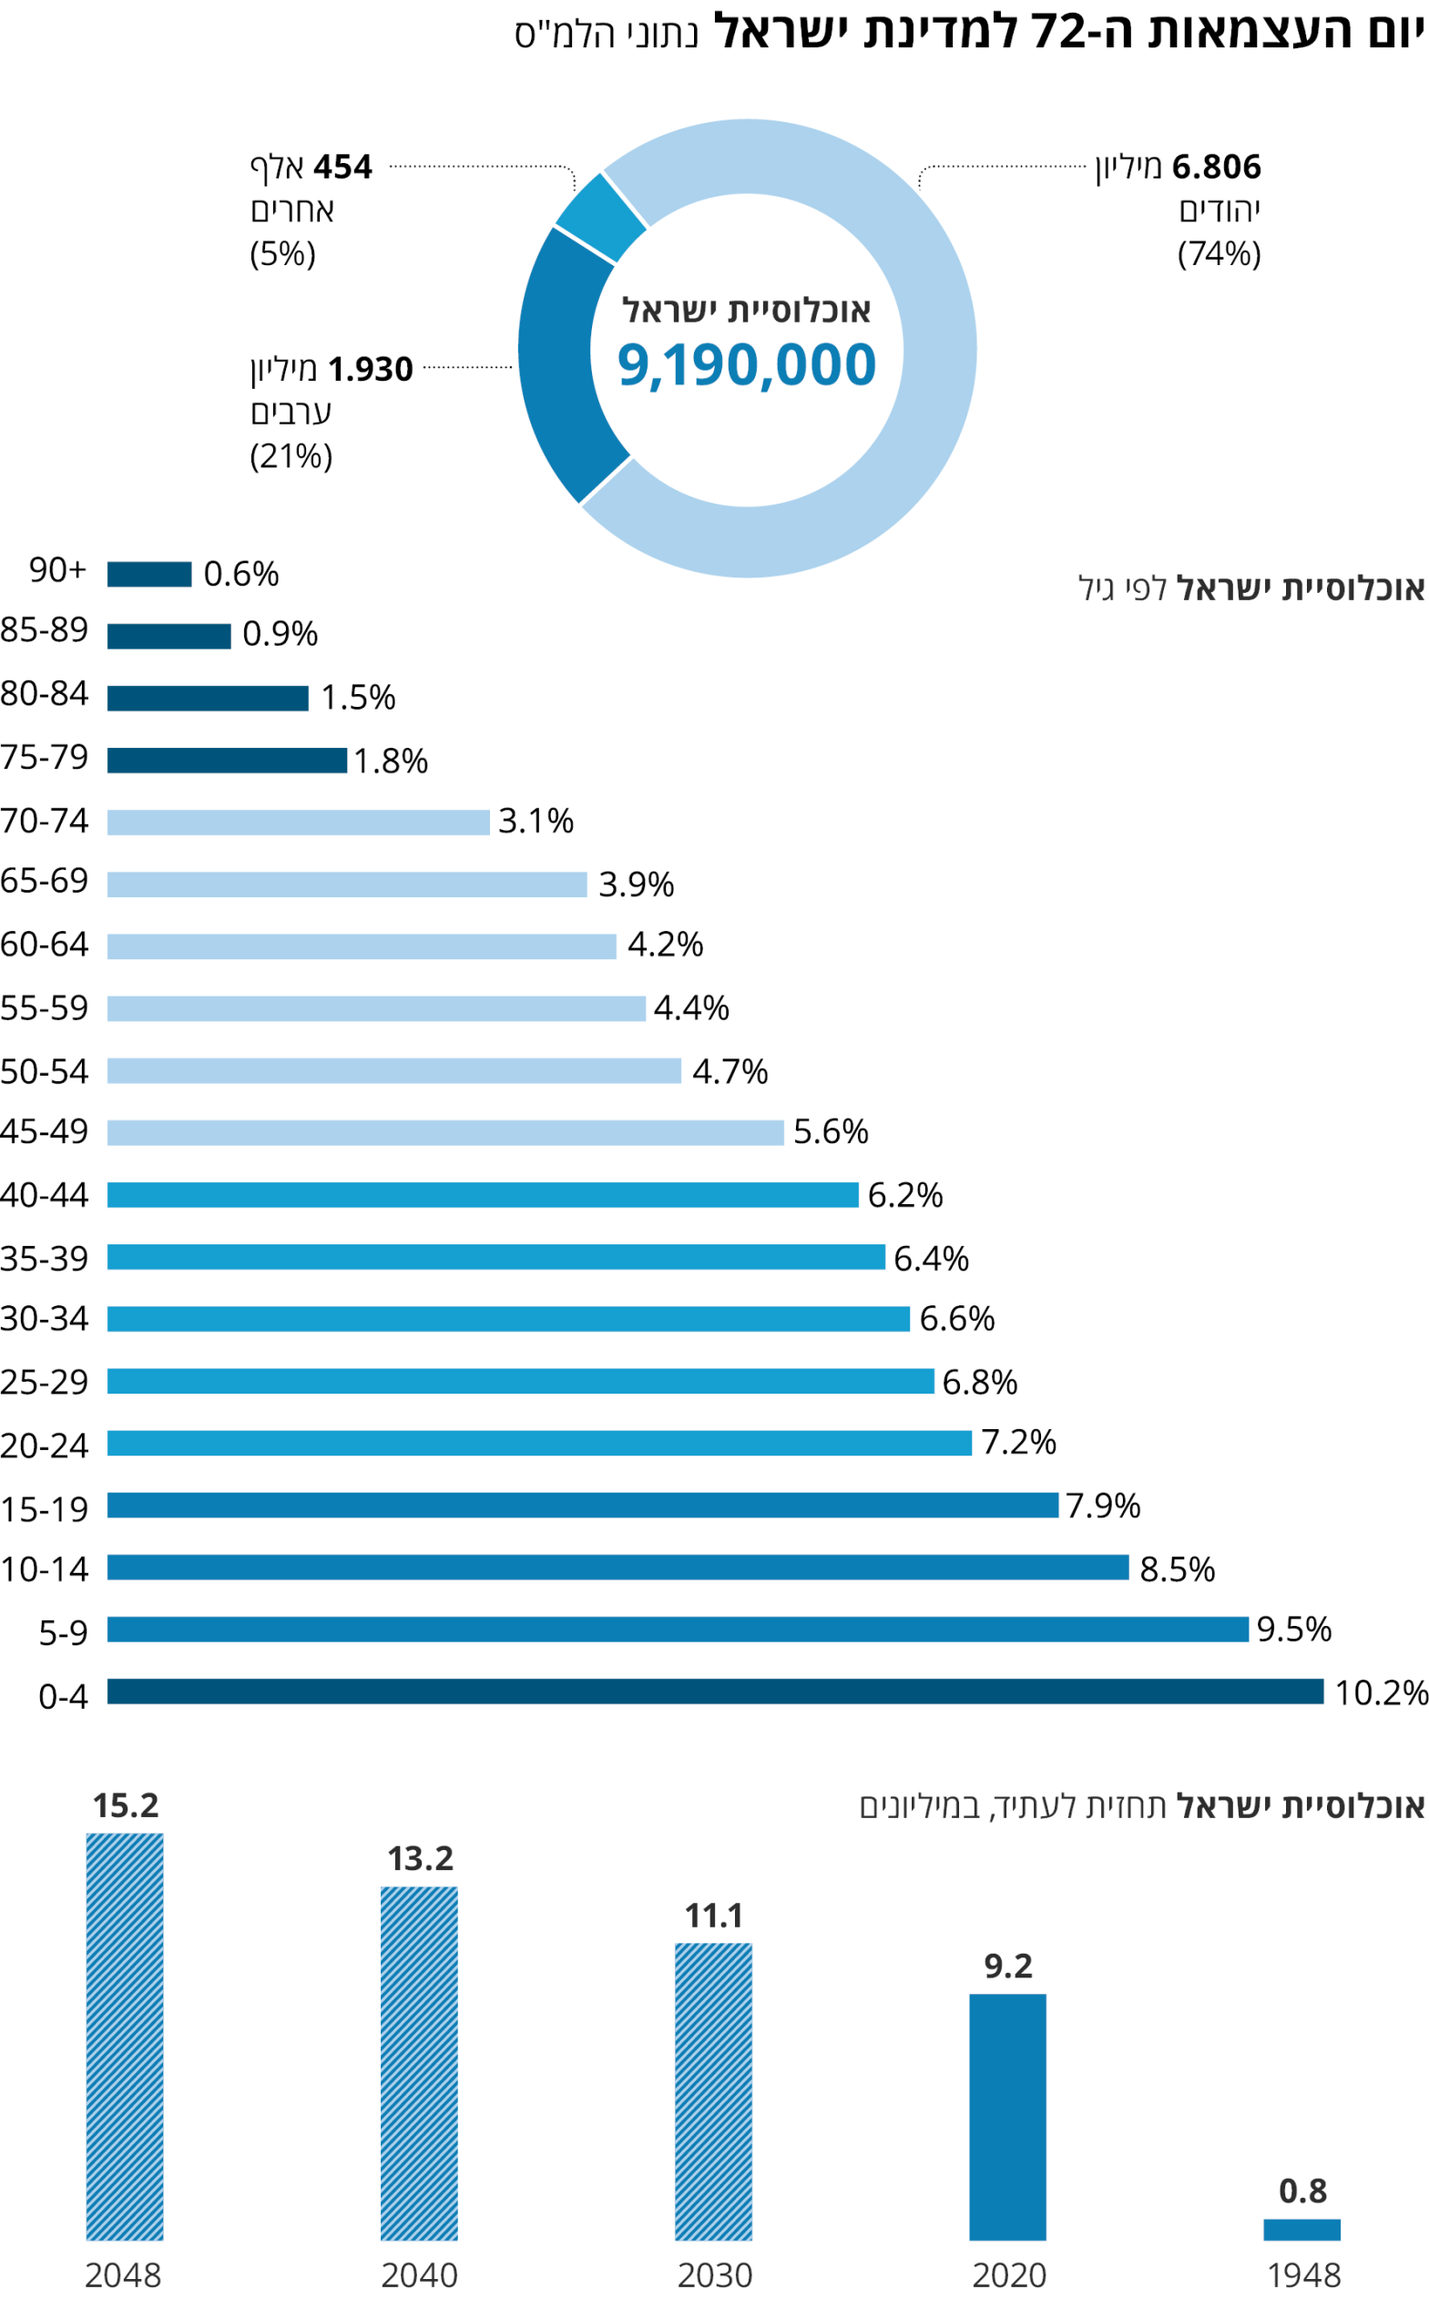

In [ ]:
total_population = 9.2 * 10**6

In [ ]:
# add data about amount in population - young table
percentage_in_population_young = {4: 10.2,
                           9: 9.5,
                           14:8.5,
                           19: 7.9}
percentage_in_population_young2 = {2: 7,
                           5: 6,
                           8:6,
                           11: 5,
                            14:5,
                            17:4,
                            20:4}
num_in_population_young = {k: v * total_population / 100 for (k, v) in percentage_in_population_young2.items()}
age_info_in_population_young = {'max_age': list(percentage_in_population_young2.keys()),
                         'percentage_age': list(percentage_in_population_young2.values()),
                         'total_age_in_population': list(num_in_population_young.values())}
age_info_in_population_young_df = pd.DataFrame.from_dict(age_info_in_population_young)

In [ ]:
# add data about amount in population - older ages
percentage_in_population = {19: 36.1,
                           24:7.2,
                           29:6.8,
                           34: 6.6,
                           39:6.4,
                           44:6.2,
                           49:5.6,
                           54:4.7,
                           59:4.4,
                           64:4.2,
                           69:3.9,
                           74:3.1,
                           79:1.8,
                           100:3}
num_in_population = {k: v * total_population / 100 for (k, v) in percentage_in_population.items()}
age_info_in_population = {'max_age': list(percentage_in_population.keys()),
                         'percentage_age': list(percentage_in_population.values()),
                         'total_age_in_population': list(num_in_population.values())}
age_info_in_population_df = pd.DataFrame.from_dict(age_info_in_population)

In [ ]:
# merge population data with covid data for both tables
age_gender_test_data = pd.merge(age_info_in_population_df, age_gender_test_data, how='right', on='max_age')
young_test_data = pd.merge(age_info_in_population_young_df, young_test_data, how='right', on='max_age')

In [ ]:
# create aggregated table of total number of cases for each week
test_data_agg_weeks = age_gender_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_deceased':'sum',
                                                                                      'weekly_cases':'sum'})
test_data_young_agg_weeks = young_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_newly_tested':'sum',
                                                                                       'weekly_cases':'sum'})

## draw results for older data 

In [ ]:
def draw_per_total(table_per_age, total_table, with_dead = True, with_new = False, seperate_tables = False):
    colors = get_cmap(n=40)
    if not seperate_tables:
        if with_dead or with_new:
            fig, ax = plt.subplots(3, 1)
        else:
            fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(table_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_total_pos = np.array(total_table['weekly_cases'])
        n_total_tests = np.array(total_table['weekly_tests_num'])
        if seperate_tables:
            if (with_dead or with_new):
                fig, ax = plt.subplots(3, 1)
            else:
                fig, ax = plt.subplots(2, 1)
        if with_dead:
            n_total_dec = np.array(total_table['weekly_deceased'])
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_total_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of dead per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            n_total_new = np.array(test_data_young_agg_weeks['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_total_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of new tests per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        percentage_in_population = df_a.percentage_age.unique().item()
        ax[0].plot(n_weeks, 100 * n_pos / n_total_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[0].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        ax[1].plot(n_weeks, 100 * n_tests / n_total_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[1].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        if seperate_tables:
            ax[0].legend()
            ax[1].legend()
            ax[0].grid()
            ax[1].grid()
            ax[0].set_title('% of positive cases per age')
            ax[1].set_title('% of tests per age')
            ax[0].set_ylabel('% of positive cases from total cases')
            if with_dead or with_new:
                ax[2].legend()
                ax[2].grid()
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('% of positive cases per age')
    ax[1].set_title('% of tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
    return fig, ax

In [ ]:
def draw_per_population(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_vaccinations_percentage(vacc_data, fig, ax):
    percentage_first = (vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_first_dose']) * 100 / total_population
    percentage_second =(vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_second_dose']) * 100 / total_population
    ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ax2 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
def draw_per_max(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        max_pos = np.max(n_pos)
        max_tests = np.max(n_tests)
        ax[0].plot(n_weeks, 100 * n_pos / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / max_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            max_dec = np.max(n_dec)
            ax[2].plot(n_weeks, 100 * n_dec / max_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            max_new = np.max(n_new)
            ax[2].plot(n_weeks, 100 * n_new / max_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/max new per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/max positive cases per age ')
    ax[1].set_title('number of tests/max tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_absolute_numbers(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new , color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases per age ')
    ax[1].set_title('number of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_lockdowns(fig, ax, max_y0, max_y1):
    lockdown_times = [(25, 30),
                     (41,47)]
    colors = ['k', 'k']
    for i, l in enumerate(lockdown_times):
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y0, alpha=0.1, color=colors[i])
        ax[0].add_patch(rec)
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y1, alpha=0.1, color=colors[i])
        ax[1].add_patch(rec)


In [ ]:
def draw_new_x_axis(data, fig, ax):
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(data.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in data.date[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y\n') for item in data.date[::12]]
    positions = data['weeks_from'].to_numpy()
    ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
    ax_new = plt.setp(ax[1], xticks=positions, xticklabels=ticklabels)

In [ ]:
age_gender_test_data

In [ ]:
fig, ax = draw_per_population(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1, max_y1=10)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_population(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1.2, max_y1=12)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_dead=False, with_new=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=45, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)
fig.tight_layout()

## combine all ages into one table

In [ ]:
age_gender_test_data_temp = age_gender_test_data[age_gender_test_data.max_age != 19]
all_testing_data = pd.concat([young_test_data, age_gender_test_data_temp]).drop(columns=['gender', 'weekly_deceased', 'weekly_newly_tested'])

In [ ]:
young_data_tot = young_test_data[young_test_data.max_age != 20]

In [ ]:
young_data_tot = young_data_tot.groupby('weeks_from', as_index=False).agg({'max_age': 'last', 
                                        'percentage_age':'sum',
                                        'total_age_in_population': 'sum',
                                        'min_age':'first',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases':'sum',
                                        'weekly_newly_tested':'sum'})

In [ ]:
all_testing_data

In [ ]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=12, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_total(young_data_tot, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[1].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[0].set_ylim([0, 50])
draw_lockdowns(fig, ax, max_y0=50, max_y1=50)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(vaccinations_data['weeks_from'], vaccinations_data.weeks_from)
# ax[0].grid()
# positions = vaccinations_data['weeks_from'].to_numpy()

# ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
# # ax[0].set_xticks(positions, labels)A
# # draw_lockdowns(fig, ax, max_y0=800000, max_y1=1)
# # draw_vaccinations_percentage(vaccinations_data, fig, ax)

In [ ]:
print(plt.style.available)

In [ ]:
fig, ax = draw_absolute_numbers(young_test_data, with_dead=False)
draw_lockdowns(fig, ax, max_y0=510000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_absolute_numbers(age_gender_test_data_temp, with_dead=False)
draw_lockdowns(fig, ax, max_y0=550000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
# draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_max(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_max(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
agg_data_temp = all_testing_data.groupby(['min_age', 'max_age'], as_index = False).agg({'percentage_age': 'first', 
                                                                         'total_age_in_population': 'first', 
                                                                        'weeks_from': 'last', 
                                                                        'weekly_tests_num': 'sum', 
                                                                        'weekly_cases': 'sum'})
total_cases = np.sum(agg_data_temp.weekly_cases)

In [ ]:
agg_data_temp['percentage_positive'] = np.round(100 * agg_data_temp.weekly_cases / total_cases, 3)

In [ ]:
# agg_data_temp[['min_age', 'max_age', 'percentage_positive']]

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
height = agg_data_temp.percentage_positive
bars = [f"{int(i)}-{j}" for i,j in zip(agg_data_temp.min_age, agg_data_temp.max_age)]
y_pos = np.arange(len(bars))
plt.grid()
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.xlabel('% of positive cases')
plt.ylabel('Age group')

In [ ]:
geo_vacc_second_over_60 = geo_vacc_per_age['second_dose_60-69'] + geo_vacc_per_age['second_dose_70-79'] + geo_vacc_per_age['second_dose_80-89'] + geo_vacc_per_age['second_dose_90+']

In [ ]:
plt.plot(geo_vacc_per_age.weeks_from, geo_vacc_second_over_60)
plt.grid()

In [ ]:
geo_vacc_per_age.weeks_from

In [ ]:
age_gender_test_data.columns

In [ ]:
Nuria_cases_death_by_age = age_gender_test_data[['weeks_from','min_age','max_age','weekly_tests_num','weekly_cases','weekly_deceased']]

In [ ]:
prec_Nuria_all_cases=Nuria_cases_death_by_age.groupby('weeks_from', as_index=False).agg({
                                        'min_age': 'last',
                                        'max_age': 'last',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases': 'sum',
                                        'weekly_deceased':'sum'})

In [ ]:
Nuria_cases_death_by_age['prec_tests']=0
Nuria_cases_death_by_age['prec_cases']=0
Nuria_cases_death_by_age['prec_deceased']=0

df=Nuria_cases_death_by_age



df.loc[df['weeks_from']==0,df[['prec_tests', 'prec_cases','prec_deceased']].columns]= 


In [ ]:


Nuria_cases_death_by_age['prec_tests']=0
Nuria_cases_death_by_age['prec_cases']=0
Nuria_cases_death_by_age['prec_deceased']=0
df=Nuria_cases_death_by_age

for i in Nuria_cases_death_by_age['weeks_from'].unique():
    v=((df.loc[df['weeks_from']==i,df[['weekly_tests_num', 'weekly_cases','weekly_deceased']].columns]).sum(axis=0)).values
    df.loc[df['weeks_from']==i,df[['prec_tests', 'prec_cases','prec_deceased']].columns]= v

In [ ]:
df['prec_tests'] =df['weekly_tests_num']/df['prec_tests'].values
df['prec_cases'] =df['weekly_cases']/df['prec_cases'].values
df['prec_deceased'] =df['weekly_deceased']/df['prec_deceased'].values

In [ ]:
df.to_csv(r'C:\Users\SPO1HFA\prediction_model\Nuria_data\prec_tests_cases_age.csv',header=True)

In [ ]:
prec_Nuria_all_cases

## draw cities per week

In [ ]:
def draw_towns_per_population(data_per_town):
    colors = get_cmap(n=200)
    fig, ax = plt.subplots(2, 1)
    for i, (t, df_t) in enumerate(data_per_town.groupby('town')):
        n_vacc = np.array(df_t['weekly_tests_num'])
        n_new_pos = np.array(df_t['weekly_cases'])
        n_weeks = np.array(df_t['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax